In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import N_A

# Imports from my packages (see the folder called utils)
sys.path.append('../utils/')
from bremsstrahlung import nr_dif_cs_dp
from screening import Fermi_length, Debye_length, fit_More_zstar

# Style of the plot
plt.style.use('../utils/minimal.style')
from helper_plots import ticks_real

In [2]:
# Physical parameters
Z = 29
T1 = 100. # 100 keV
g1 = 1. + T1 / 511.
Lf = Fermi_length(Z)

In [3]:
# Provide details on the plasma density
A = 63.546
rho = 8.96 # g/cm^3
ni = 1.e6 * N_A * rho / A # /m^3

# Provide details on the plasma temperature
Tplasma = [0., 0.1, 10.]

# Deduce the ionization degree
Zstar = np.array([ fit_More_zstar(Z, A, rho, T) for T in Tplasma ])
N = len(Tplasma)

In [4]:
# discretization of k axis
Nk = 1000
axis_k  = np.linspace(0., g1-1., Nk)

In [5]:
# Non-relativistic cross-section with Elwert correction
cs_screen = np.zeros([N,Nk])
for i in range(N):
    cs_screen[i,:] = np.array([ nr_dif_cs_dp(Z, k, g1, Tplasma[i], ni, Zstar[i]) for k in axis_k ])
    cs_screen[i,:] = axis_k * cs_screen[i,:]

In [6]:
# Non-relativistic cross-section with Elwert correction
# We introduce on purpose the wrong term 1/beta_1 ** 2
p1 = np.sqrt(g1 ** 2 - 1.)
b1 = np.sqrt(1.-(1. / g1 ** 2))
cs_screen_error = np.zeros([N,Nk])
for i in range(N):
    cs_screen_error[i,:] = cs_screen[i,:] * (p1 / b1) ** 2

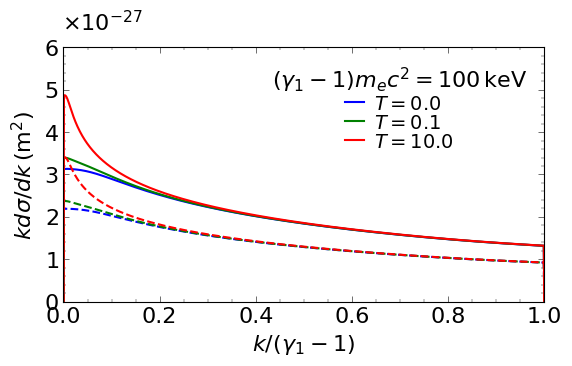

In [7]:
cc=['b','g','r']

fig, axs = plt.subplots(1, 1, figsize=(6,4))
#axs.plot(axis_k / (gamma_1 - 1.), cs_screen_tf, label=r"$T=0.0 \quad Z*=0.0 $")
for i in range(N):
    axs.plot(axis_k / (g1 - 1.), cs_screen[i], c=cc[i], ls='--')
    axs.plot(axis_k / (g1 - 1.), cs_screen_error[i], c=cc[i], label=r"$ T={:.1f} $".format(Tplasma[i]))
axs.set_xlabel(r"$ k / (\gamma_1 - 1) $")
axs.set_xlim([0.,1.])
axs.set_ylabel(r"$ k d \sigma / dk \, \rm (m^2)$")
axs.set_ylim([0., 6.e-27])
location = np.linspace(0., 6.e-27, 7)
axs.yaxis.set_ticks(location)
axs.yaxis.set_ticklabels([ticks_real(1.e27*elem,0) for elem in location])
axs.text(0.08, 1.1, r'$ \times 10^{-27} $', ha='center', va='center', transform=axs.transAxes, bbox=dict(alpha=0, facecolor="white", edgecolor="white") )
plt.legend(loc='best', ncol=1, title=r"$(\gamma_1-1)m_ec^2=100 \, \rm keV$")
plt.tight_layout()
plt.show()
#plt.savefig("figure_2_article_correct.png", dpi=150)